# Assignment 3

## Austin Booth

Link:

### Exercise 1

In [3]:
# Estimate a time constant

# input estimated parameters
alpha = 0.00016 # watts/(units P1*percent U1)
P1 = 200 # units P1
U1 = 50 # percent power
T1 = 53 # degrees C
T_amb = 21 # degrees C

# calculate Ua
Ua = alpha*P1*U1 / (T1-T_amb)

# print Ua
print('Ua =',Ua,'W/K.')

# print Cp estimate from fit in notebook
Cp = 8 # J/K
print('Cp =',Cp,'J/K.')


# time constant = tau = -1/a = - (-Cp/Ua) = Cp/Ua
tau = Cp / Ua # J/W = seconds

print('Time constant:',tau,'seconds.')

Ua = 0.05 W/K.
Cp = 8 J/K.
Time constant: 160.0 seconds.


The estimated time constant, calculated from the estimated Ua and Cp, is 160 seconds.

### Exercise 2

To estimate the time constant from experimental data, we can observe a graph of the data and estimate the half-life. According to the graph in subsection 2.3.2.5 of the Section 2.3 class activity, the maximum (approximately steady-state) temperature is around 53 C, while the ambient temperature is around 21 C. The total temperature change is then (53-21) = 32 C. 

The half-life in this context is the time the system takes to reach half of its total steady-state temperature difference. This would be 0.5 * 32 = 16 C difference, which occurs when the system reaches 21 + 16 = 37 C. According to the graph, 37 C is reached at approximately 130 seconds.

$\tau_{1/2}$ = 130 seconds

Now, we can estimate the time constant by using $$\tau_{1/2} = 0.693\tau$$.

$\tau$ = (130 s / 0.693) = 187 or approximately 190 seconds

$\tau$ = 190 seconds

This experimental estimate of the time constant is about 20% larger than the estimate calculated using fitted parameters. This reflects the trend seen by comparing the fitted trend to the experimental data: the fitted trend overestimates the actual data in the early part of the experiment, so it reaches half the temperature difference more quickly and has a shorter half-life than the experimental data.

### Exercise 3

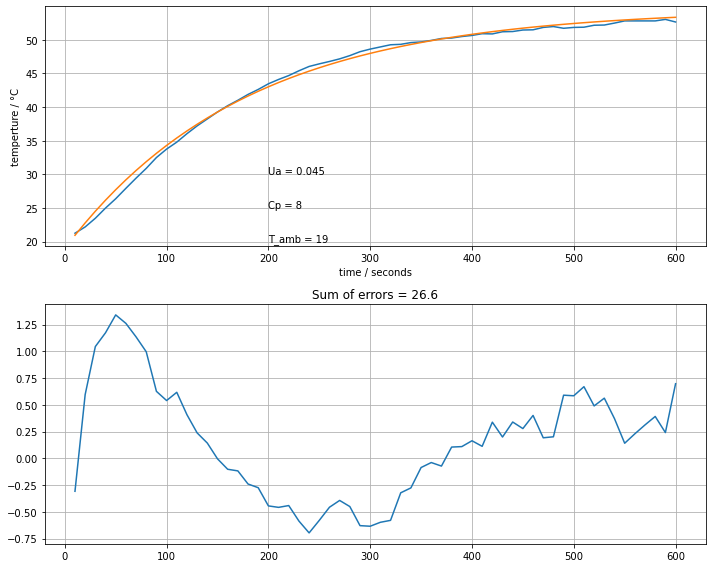

In [32]:
# import data
    
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data_file = "data/Model_Data.csv"
data = pd.read_csv("https://jckantor.github.io/cbe30338-2021/" + data_file).set_index("Time")[1:]
t = data.index
T1 = data['T1'].values

# parameter values and units
alpha = 0.00016        # watts / (units P1 * percent U1)
P1 = 200               # P1 units
Ua = 0.05              # watts/deg C
Cp = 6                 # joules/deg C
U1 = 50                # steady state value of u1 (percent)
T_amb = 21             # deg C

def compare3(Ua, Cp, T_amb):
    T1_dev_initial = 0
    T1_dev_ss = alpha*P1*U1/Ua
    T1_dev = T1_dev_ss + (T1_dev_initial - T1_dev_ss)*np.exp(-Ua*t/Cp)
    T1_model = T1_dev + T_amb
    
    fig, ax = plt.subplots(2, 1, figsize=(10,8))
    
    ax[0].plot(t, T1, t, T1_model)
    ax[0].set_xlabel('time / seconds')
    ax[0].set_ylabel('temperture / °C')
    ax[0].grid(True)

    ax[0].text(200, 30, f'Ua = {Ua}')
    ax[0].text(200, 25, f'Cp = {Cp}')
    ax[0].text(200, 20, f'T_amb = {T_amb}')
    
    ax[1].plot(t, T1_model - T1)
    ax[1].set_title(f'Sum of errors = {sum(abs(T1_model-T1)):0.1f}')
    ax[1].grid(True)
    
    plt.tight_layout()

compare3(0.045, 8, 19)

Parameters of Ua = 0.045 W/K, Cp = 8 J/K, and T_amb = 19 degrees C fit the experimental data very well, to within 1 degree C in most cases. The earliest behavior still varies from predicted behavior the most, but this model captures it much more closely than the two-component model, to within around 1.25 degrees C. The overall sum of errors is cut approximately in half compared to the two-parameter model. Additionally, the error is not as extremely lopsided as before; low but noticeable deviation from predictions is seen on both ends of the graph, and the early error is not as overwhelming.

This result certainly reduces the structural error in the model, particularly at early times when containing error is most valuable. However, questions can also be raised about the applicability of the model to early time values, since the model relies on an ambient temperature of 19 C, which is lower than that actually observed and may underestimate temperatures at very early time values.